In [1]:
import numpy as np
# import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import datetime
from datetime import datetime
import dateutil
import os
import calendar
import pymannkendall as mk
import itertools
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

/N/u/alpande/Quartz/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
FreqCountDF = xr.open_dataset('./data/Event Data/FreqCountDF.nc').drop_encoding()
FreqCountFD = xr.open_dataset('./data/Event Data/FreqCountFD.nc').drop_encoding()
FreqCountDFD = xr.open_dataset('./data/Event Data/FreqCountDFD.nc').drop_encoding()
FreqCountFDF = xr.open_dataset('./data/Event Data/FreqCountFDF.nc').drop_encoding()
ds_df = xr.open_dataset('data/nclimgrid-spei-gamma-01.nc')
dfaami = xr.open_dataset('./data/dfaami_01.nc')
mi = xr.open_dataset('./data/mi_01.nc')
mAFDF = xr.open_dataset('./data/Event Data/meanAnnualFreq/mAFDF.nc')

In [30]:
dfaami

<xarray.Dataset> Size: 10GB
Dimensions:  (lat: 596, lon: 1385, time: 1552)
Coordinates:
  * lat      (lat) float32 2kB 24.56 24.6 24.65 24.69 ... 49.27 49.31 49.35
  * lon      (lon) float32 6kB -124.7 -124.6 -124.6 ... -67.1 -67.06 -67.02
  * time     (time) datetime64[ns] 12kB 1895-01-01 1895-02-01 ... 2024-04-01
Data variables:
    dfaami   (lat, lon, time) float64 10GB nan nan nan nan ... nan nan nan nan
Attributes: (12/16)
    date_created:              2024-05-04  06:11:41
    date_modified:             2024-05-04  06:11:41
    title:                     SPEI/Gamma 1-month values computed by NIDIS/NC...
    source:                    NIDIS/NCEI/NOAA
    summary:                   SPEI/Gamma 1-month values computed by NIDIS/NC...
    institution:               National Centers for Environmental Information...
    ...                        ...
    geospatial_lat_min:        24.5625
    geospatial_lat_max:        49.354168
    geospatial_lon_min:        -124.6875
    geospatial_lon_max:        -67.020836
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east

In [4]:
mk_DF = xr.open_dataset('./data/mk/mk_DF.nc').drop_encoding()
mk_FD = xr.open_dataset('./data/mk/mk_FD.nc').drop_encoding()
mk_DFD = xr.open_dataset('./data/mk/mk_DFD.nc').drop_encoding()
mk_FDF = xr.open_dataset('./data/mk/mk_FDF.nc').drop_encoding()

In [ ]:
data = FreqCountFD['__xarray_dataarray_variable__'].rename('count')
data.to_netcdf('./data/Event Data/CountFD.nc')
CountFD = xr.open_dataset('./data/Event Data/CountFD.nc')
CountFD

In [3]:
def calculate_mk(values):
    val = mk.original_test(values)
    return val.trend, val.h, val.p, val.slope

In [ ]:
tmpVal = CountDF['count'].sel(lat=24.5625, lon=-81.8125, method='nearest')
res = calculate_mk(tmpVal)
# mk.original_test(tmpVal)
tmpVal

In [ ]:
start = datetime.now()

result = xr.apply_ufunc(
    calculate_mk, 
    FreqCountFD,
    input_core_dims=[['year']], 
    output_core_dims=[[], [], [], []],
    dask='parallelized',  
    vectorize=True,
)

print(datetime.now() - start)

val2 = xr.merge([result[0].rename({'__xarray_dataarray_variable__':'trend'}), result[1].rename({'__xarray_dataarray_variable__':'h'}), result[2].rename({'__xarray_dataarray_variable__':'p'}), result[3].rename({'__xarray_dataarray_variable__':'slope'})], compat='override')

val2.to_netcdf('./data/mk/mk_FD.nc')

In [ ]:
val2.sel(lat='27.56', lon='-80.73', method = 'nearest').values
mk_FD = xr.open_dataset('./data/mk/mk_FD.nc')
mk_FD

In [116]:
names = ['mk_DF']
ds = [FreqCountDF]

for i in range(len(names)):
    start = datetime.now()

    result = xr.apply_ufunc(
        calculate_mk, 
        ds[i],
        input_core_dims=[['year']], 
        output_core_dims=[[], [], [], []],
        dask='parallelized',  
        vectorize=True,
    )

    print(datetime.now() - start)

    val = xr.merge([result[0].rename({'__xarray_dataarray_variable__':'trend'}), result[1].rename({'__xarray_dataarray_variable__':'h'}), result[2].rename({'__xarray_dataarray_variable__':'p'}), result[3].rename({'__xarray_dataarray_variable__':'slope'})], compat='override')

    val.to_netcdf('./data/mk/{}.nc'.format(names[i]))

0:53:58.490825


In [ ]:
np.where((mk_FDF['trend']!='increasi') & (mk_FDF['trend']!='no trend'))
mk_FDF
# val2.to_netcdf('./data/mk/mk_test.nc')

# tempds = xr.open_dataset('./data/mk/mk_test.nc')
# tempds

In [ ]:
for i in range(len(event)):
    if event[i][-1]=='D':
        print(event[i])

In [113]:
print(FreqCountDFD['__xarray_dataarray_variable__'].sel(lat='27.56', lon='-80.73', method = 'nearest'))
print(FreqCountFDF['__xarray_dataarray_variable__'].sel(lat='27.56', lon='-80.73', method = 'nearest'))


<xarray.DataArray '__xarray_dataarray_variable__' (year: 129)> Size: 1kB
array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 2., 0., 1., 1., 0., 1., 1., 0., 2., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 2., 2., 0.,
       1., 0., 1., 0., 0., 1., 0., 3., 2., 0.])
Coordinates:
    lat      float32 4B 27.56
    lon      float32 4B -80.73
  * year     (year) int64 1kB 1895 1896 1897 1898 1899 ... 2020 2021 2022 2023
<xarray.DataArray '__xarray_dataarray_variable__' (year: 129)> Size: 1kB
array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.

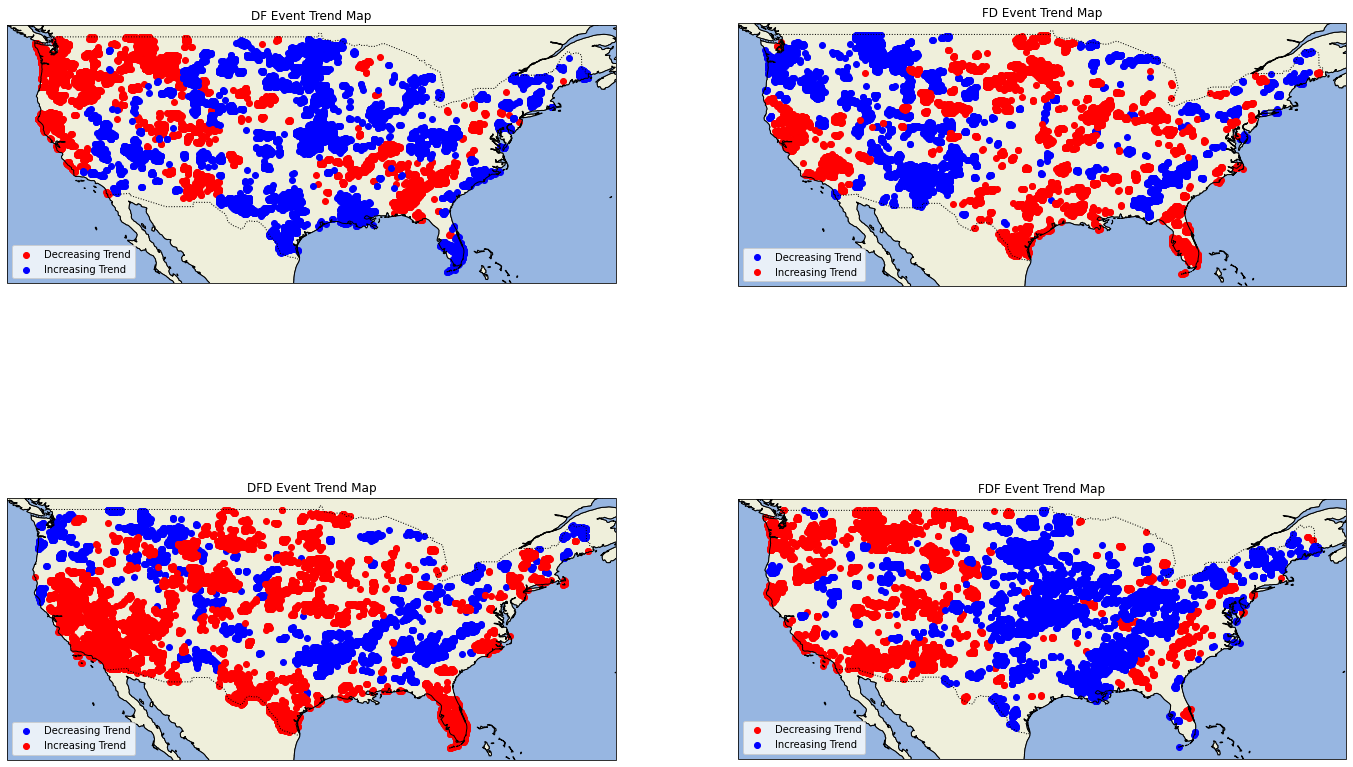

In [119]:
ds = [mk_DF, mk_FD, mk_DFD, mk_FDF]
event = ['DF', 'FD', 'DFD', 'FDF']

fig, ax = plt.subplots(2, 2, figsize=(24, 16), subplot_kw={'projection': ccrs.PlateCarree()})


for val in range(len(ds)):
    filtered_indices_d = np.where((ds[val]['trend']!='increasi') & (ds[val]['trend']!='no trend'))
    filtered_trend_d = ds[val]['trend'].values[filtered_indices_d]
    filtered_lat_d = ds[val]['lat'].values[filtered_indices_d[0]]
    filtered_lon_d = ds[val]['lon'].values[filtered_indices_d[1]]
    filtered_indices_i = np.where((ds[val]['trend']!='decreasi') & (ds[val]['trend']!='no trend'))
    filtered_trend_i = ds[val]['trend'].values[filtered_indices_i]
    filtered_lat_i = ds[val]['lat'].values[filtered_indices_i[0]]
    filtered_lon_i = ds[val]['lon'].values[filtered_indices_i[1]]
#     print(val, event[val], ds[val])
    i, j = 0, 0
    if val==0:
        i, j = 0, 0
    elif val==1:
        j=1
    elif val==2:
        i=1
    else:
        i=1
        j=1
        
    if event[val]=='FD' or event[val]=='DFD':
        ax[i, j].scatter(filtered_lon_d, filtered_lat_d, c='blue', label='Decreasing Trend', transform=ccrs.PlateCarree())
        ax[i, j].scatter(filtered_lon_i, filtered_lat_i, c='red', label='Increasing Trend', transform=ccrs.PlateCarree())
    else:
        ax[i, j].scatter(filtered_lon_d, filtered_lat_d, c='red', label='Decreasing Trend', transform=ccrs.PlateCarree())
        ax[i, j].scatter(filtered_lon_i, filtered_lat_i, c='blue', label='Increasing Trend', transform=ccrs.PlateCarree())

    # Add map features
    ax[i, j].add_feature(cfeature.COASTLINE)
    ax[i, j].add_feature(cfeature.BORDERS, linestyle=':')
    ax[i, j].add_feature(cfeature.LAND, edgecolor='black')
    ax[i, j].add_feature(cfeature.OCEAN)

    # Add title and legend
    ax[i, j].set_title('{} Event Trend Map'.format(event[val]))
    ax[i, j].legend()


plt.show()

In [7]:
1895+29

1924

In [ ]:
len(np.arange(1895,2024))
# 1895,1924; 30-yr period
# 1925,1954
...
# 2023

In [ ]:
dfaami

In [ ]:

lat_dim, lon_dim = dfaami['lat'], dfaami['lon']
result_array = np.full((len(lat_dim), len(lon_dim)), np.nan)

for lat_idx in range(len(lat_dim)):
    for lon_idx in range(len(lon_dim)):
        time_series = year1895_1924['dfaami'].sel(lat=lat_dim[lat_idx], lon=lon_dim[lon_idx])
        
        result_array[lat_idx, lon_idx] = mostFreqMonth(time_series)
    print(lat_idx)


In [49]:
year1895_1924 = dfaami.sel(time=slice('1895-01-01','1924-12-12'))
year1925_1954 = dfaami.sel(time=slice('1925-01-01','1954-12-12'))
year1955_1984 = dfaami.sel(time=slice('1955-01-01','1984-12-12'))
year1985_2023 = dfaami.sel(time=slice('1985-01-01','2023-12-12'))

In [10]:
def most_freq_month_fd(values, times):
    indices = np.where(values < -0.5)[0]
    if len(indices) == 0:
        return np.nan
    
    # Convert times to pandas DatetimeIndex
    time_index = pd.DatetimeIndex(times[indices])
    months = time_index.month
    
    unique_months, counts = np.unique(months, return_counts=True)
    if len(unique_months) == 0:
        return np.nan
    max_count = np.max(counts)
    most_common_months = unique_months[counts == max_count]
    return most_common_months[0]

In [50]:
lis=[year1985_2023]
names=['1985_2023']
for i in range(len(lis)):
    # Apply the function to your data using apply_ufunc
    result = xr.apply_ufunc(
        most_freq_month,
        lis[i],
        lis[i].time,
        input_core_dims=[['time'], ['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[float]
    )
#     result.to_netcdf('./data/mfm/mfm_df_{}.nc'.format(names[i]))

In [58]:
result.to_netcdf('./data/mfm/fd/mfm_fd_1985_2023.nc')

In [ ]:
result_da = xr.DataArray(result_array, dims=['lat', 'lon'], coords={'lat': dfaami['lat'], 'lon': dfaami['lon']})

new_ds = xr.Dataset({'mfm_df': result_da})
new_ds.to_netcdf('./data/mfm/mfm_df.nc')

In [29]:
mostFreqMonth(year1925_1954.dfaami.sel(lat=lat_dim[0], lon=lon_dim[1029], method = 'nearest'))
# (new_ds.mfm_df.sel(lat=lat_dim[0], lon=lon_dim[1029], method = 'nearest'))

<xarray.DataArray 'dfaami' (time: 360)> Size: 3kB
array([1.017152,      nan,      nan, ...,      nan, 1.899023,      nan])
Coordinates:
    lat      float32 4B 24.56
    lon      float32 4B -81.81
  * time     (time) datetime64[ns] 3kB 1925-01-01 1925-02-01 ... 1954-12-01
[8]


8

In [356]:
dfaami['dfaami'].sel(lat=lat_dim[0], lon=lon_dim[1029])

<xarray.DataArray 'dfaami' (time: 1552)> Size: 12kB
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    lat      float32 4B 24.56
    lon      float32 4B -81.81
  * time     (time) datetime64[ns] 12kB 1895-01-01 1895-02-01 ... 2024-04-01

In [25]:
dfaami['dfaami']

<xarray.DataArray 'dfaami' (lat: 596, lon: 1385, time: 1552)> Size: 10GB
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lat      (lat) float32 2kB 24.56 24.6 24.65 24.69 ... 49.27 49.31 49.35
  * lon      (lon) float32 6kB -124.7 -124.6 -124.6 ... -67.1 -67.06 -67.02
  * time     (time) datetime64[ns] 12kB 1895-01-01 1895-02-01 ... 2024-04-01

In [ ]:
res_m = mostFreqMonth(dfaami.dfaami.sel(lat='27.56', lon='-80.73', method = 'nearest'))

In [ ]:
# max(res_m[1])
# res_m[0][np.where(res_m[1]==max(res_m[1]))[0][0]]
res_m

In [ ]:
lis=[]
lis.append((dfaami.dfaami.sel(lat='27.56', lon='-80.73', method = 'nearest'))[2].drop_encoding().time.dt.month)

In [9]:
def most_freq_month_df(values, times):
    indices = np.where(values > 0.5)[0]
    if len(indices) == 0:
        return np.nan
    
    # Convert times to pandas DatetimeIndex
    time_index = pd.DatetimeIndex(times[indices])
    months = time_index.month
    
    unique_months, counts = np.unique(months, return_counts=True)
    if len(unique_months) == 0:
        return np.nan
    max_count = np.max(counts)
    most_common_months = unique_months[counts == max_count]
    return most_common_months[0]


lis=[year1895_1924, year1925_1954, year1955_1984, year1985_2023]
names=['1895_1924', '1925_1954', '1955_1984', '1985_2023']
for i in range(len(lis)):
    start = datetime.now()
    # Applying the function to your data using apply_ufunc
    result = xr.apply_ufunc(
        most_freq_month_df,
        lis[i],
        lis[i].time,
        input_core_dims=[['time'], ['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[float]
    )
    result.to_netcdf('./data/mfm/df/mfm_df_{}.nc'.format(names[i]))
    print(datetime.now()-start)

In [13]:
func_list = [most_freq_month_df, most_freq_month_fd, most_freq_month_dfd, most_freq_month_fdf]
datasets = [dfaami, mi]
names = ['df', 'fd', 'dfd', 'fdf']

for i in range(4):
    data = datasets[0]
    if i>1:
        data = datasets[1]
    start = datetime.now()
    
    result = xr.apply_ufunc(
        func_list[i],
        data,
        data.time,
        input_core_dims=[['time'], ['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[float]
    )
    result.to_netcdf('./data/mfm/mfm_{}.nc'.format(names[i]))
    print(datetime.now()-start)

0:01:47.167805
0:01:45.377411
0:01:44.634898
0:01:41.127610


In [17]:
mfm_df = xr.open_dataset('./data/mfm/mfm_df.nc')
mfm_fd = xr.open_dataset('./data/mfm/mfm_fd.nc')    
mfm_dfd = xr.open_dataset('./data/mfm/mfm_dfd.nc')
mfm_fdf = xr.open_dataset('./data/mfm/mfm_fdf.nc')    

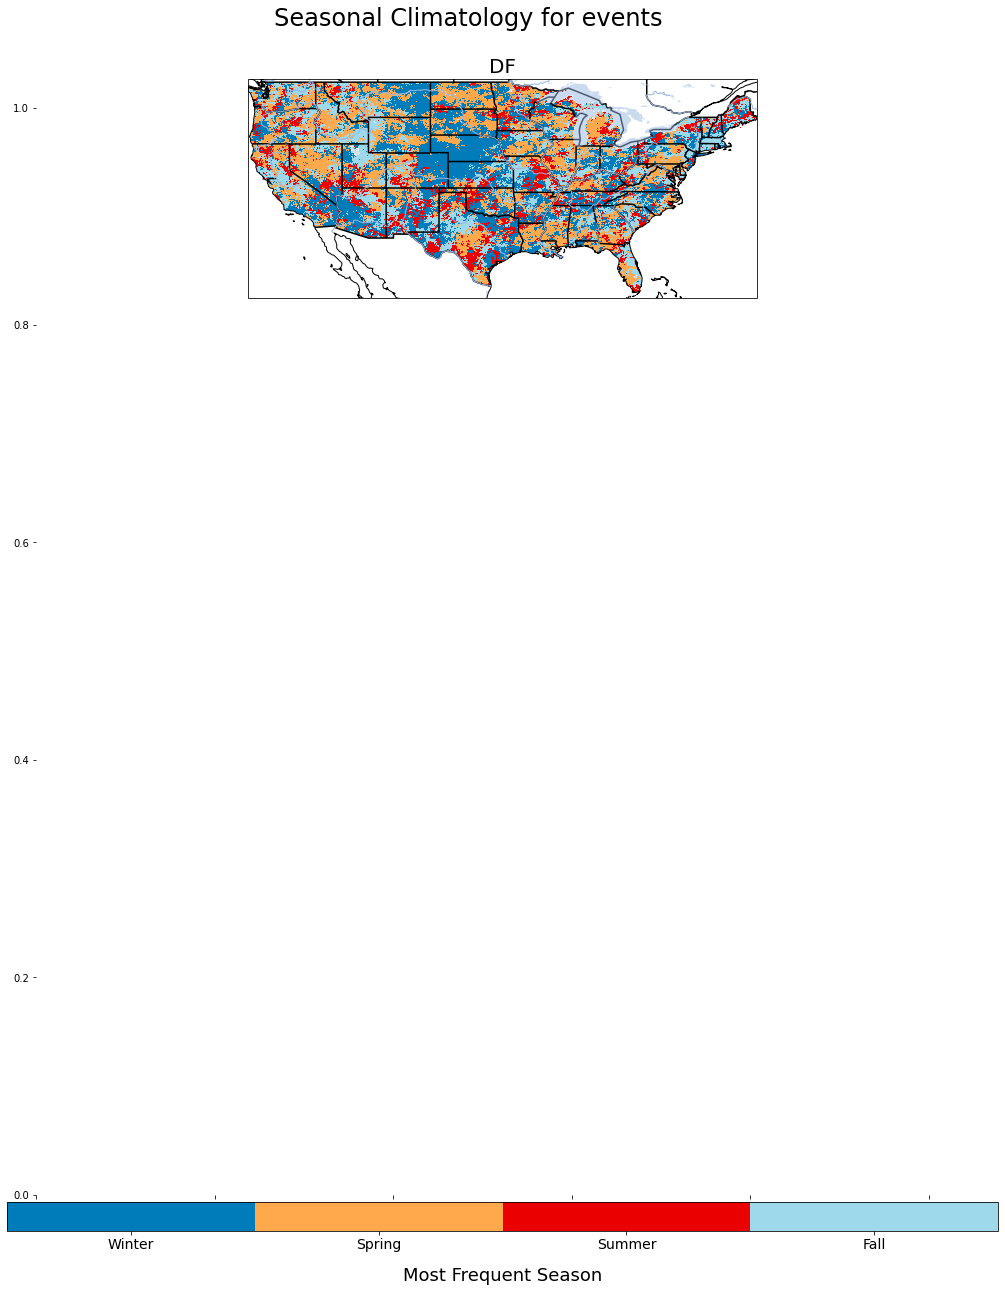

In [24]:
dataset = [mfm_df, mfm_fd, mfm_dfd, mfm_fdf]

names = ['DF', 'FD', 'DFD', 'FDF']

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

plt.rc('axes.spines', **{'bottom':False, 'left':False, 'right':False, 'top':False})
# Define seasons
def month_to_season(month):
    if np.isnan(month):
        return np.nan
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

# Define colormap and norm for seasons
season_colors = ['#007cbb', '#FFA94C', '#eb0000', '#9ED9EB']  # Blue, Green, Orange, Brown
cmap = mcolors.ListedColormap(season_colors)
cmap.set_bad('white', 1.)
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5], ncolors=4)
ocean_color = np.float64([209,230,241])/255
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])


fig, ax = plt.subplots(1, 1, figsize=(16, 20))
gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig)
gs.update(left=0.1, right=0.96, top=0.9, bottom=0.2, wspace=0.1, hspace=0.2)
bottoms, tops, lefts, rights = gs.get_grid_positions(fig)

for i in range(1):
    row, col = divmod(i, 1)
    ax_sub = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())

    # Convert months to seasons
    if i==0 or i==1:
        seasonal_data = np.vectorize(month_to_season)(dataset[i]['dfaami'].values)
    else:
        seasonal_data = np.vectorize(month_to_season)(dataset[i]['mi'].values)

    c = ax_sub.pcolormesh(dataset[i]['lon'], dataset[i]['lat'], seasonal_data, 
                          transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    ax_sub.add_feature(cfeature.COASTLINE)
    ax_sub.add_feature(cfeature.BORDERS, linewidth=1.5, linestyle='-')
    ax_sub.add_feature(states_provinces, linewidth=1.5, linestyle='-', edgecolor='k')
    ax_sub.add_feature(cfeature.LAND, edgecolor='black')
    ax_sub.add_feature(cfeature.OCEAN,color='#E9EBE6',zorder=0,edgecolor='k')
    ax_sub.add_feature(cfeature.LAKES, alpha=0.5)
    ax_sub.add_feature(cfeature.RIVERS)

#         ax_sub.set_aspect("auto")
    ax_sub.set_title('{}'.format(names[i]), size=20)

# Create a common colorbar
cax = fig.add_axes([lefts[0], 0.1, rights[0]-lefts[0], 0.02])
cbar = fig.colorbar(c, cax=cax, orientation="horizontal", extend="neither")
cbar.set_label('Most Frequent Season', size=18, labelpad=15)
cbar.ax.tick_params(labelsize=14)

# Adjust colorbar ticks to show season names
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['Winter', 'Spring', 'Summer', 'Fall'])

plt.suptitle('Seasonal Climatology for events', fontsize=24, y=0.95)

plt.savefig('./data/seasonal_chart.png')

plt.show()

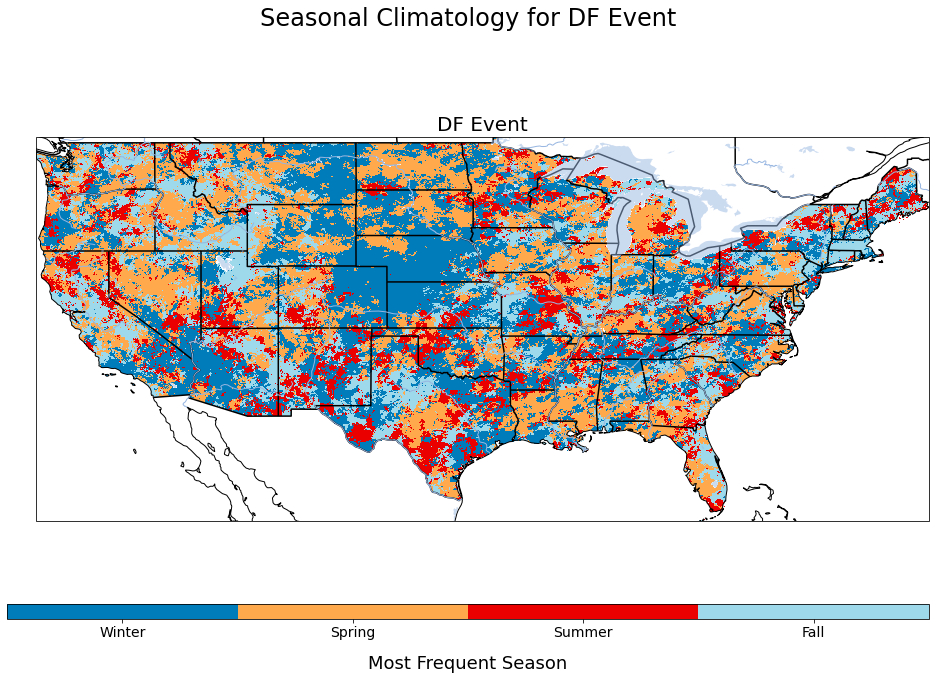

In [29]:

def month_to_season(month):
    if np.isnan(month):
        return np.nan
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

# Define colormap and norm for seasons
season_colors = ['#007cbb', '#FFA94C', '#eb0000', '#9ED9EB']  # Blue, Green, Orange, Brown
cmap = mcolors.ListedColormap(season_colors)
cmap.set_bad('white', 1.0)
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5], ncolors=4)

# Convert months to seasons
seasonal_data = np.vectorize(month_to_season)(mfm_df['dfaami'].values)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw={'projection': ccrs.PlateCarree()})
c = ax.pcolormesh(mfm_df['lon'], mfm_df['lat'], seasonal_data, 
                  transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=1.5, linestyle='-')
ax.add_feature(states_provinces, linewidth=1.5, linestyle='-', edgecolor='k')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, color='#E9EBE6', zorder=0, edgecolor='k')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

ax.set_title('DF Event', size=20)

# Create a colorbar
cax = fig.add_axes([0.1, 0.1, 0.8, 0.02])
cbar = fig.colorbar(c, cax=cax, orientation="horizontal", extend="neither")
cbar.set_label('Most Frequent Season', size=18, labelpad=15)
cbar.ax.tick_params(labelsize=14)

# Adjust colorbar ticks to show season names
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['Winter', 'Spring', 'Summer', 'Fall'])

plt.suptitle('Seasonal Climatology for DF Event', fontsize=24, y=0.95)

# Save the figure
plt.savefig('./data/seasonal_chart_DF_event.png')

plt.show()


In [ ]:
year1895_1924_mi = mi.sel(time=slice('1895-01-01','1924-12-12'))
year1925_1954_mi = mi.sel(time=slice('1925-01-01','1954-12-12'))
year1955_1984_mi = mi.sel(time=slice('1955-01-01','1984-12-12'))
year1985_2023_mi = mi.sel(time=slice('1985-01-01','2023-12-12'))

In [11]:
def most_freq_month_dfd(values, times):
    indices = np.where(values > 0.5)[0]
    if len(indices) == 0:
        return np.nan
    
    # Convert times to pandas DatetimeIndex
    time_index = pd.DatetimeIndex(times[indices])
    months = time_index.month
    
    unique_months, counts = np.unique(months, return_counts=True)
    if len(unique_months) == 0:
        return np.nan
    max_count = np.max(counts)
    most_common_months = unique_months[counts == max_count]
    return most_common_months[0]


lis=[year1895_1924_mi, year1925_1954_mi, year1955_1984_mi, year1985_2023_mi]
names=['1895_1924', '1925_1954', '1955_1984', '1985_2023']
for i in range(len(lis)):
    start = datetime.now()
    # Apply the function to your data using apply_ufunc
    result = xr.apply_ufunc(
        most_freq_month_dfd,
        lis[i],
        lis[i].time,
        input_core_dims=[['time'], ['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[float]
    )
    result.to_netcdf('./data/mfm/dfd/mfm_dfd_{}.nc'.format(names[i]))
    print(datetime.now()-start)

In [12]:
def most_freq_month_fdf(values, times):
    indices = np.where(values < 0.5)[0]
    if len(indices) == 0:
        return np.nan
    
    # Convert times to pandas DatetimeIndex
    time_index = pd.DatetimeIndex(times[indices])
    months = time_index.month
    
    unique_months, counts = np.unique(months, return_counts=True)
    if len(unique_months) == 0:
        return np.nan
    max_count = np.max(counts)
    most_common_months = unique_months[counts == max_count]
    return most_common_months[0]


lis=[year1895_1924_mi, year1925_1954_mi, year1955_1984_mi, year1985_2023_mi]
names=['1895_1924', '1925_1954', '1955_1984', '1985_2023']
for i in range(len(lis)):
    start = datetime.now()
    # Apply the function to your data using apply_ufunc
    result = xr.apply_ufunc(
        most_freq_month_fdf,
        lis[i],
        lis[i].time,
        input_core_dims=[['time'], ['time']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[float]
    )
    result.to_netcdf('./data/mfm/fdf/mfm_fdf_{}.nc'.format(names[i]))
    print(datetime.now()-start)

In [71]:
mfm_df_01 = xr.open_dataset('./data/mfm/df/mfm_df_1895_1924.nc').drop_encoding()
mfm_df_02 = xr.open_dataset('./data/mfm/df/mfm_df_1925_1954.nc').drop_encoding()
mfm_df_03 = xr.open_dataset('./data/mfm/df/mfm_df_1955_1984.nc').drop_encoding()
mfm_df_04 = xr.open_dataset('./data/mfm/df/mfm_df_1985_2023.nc').drop_encoding()

mfm_fd_01 = xr.open_dataset('./data/mfm/fd/mfm_fd_1895_1924').drop_encoding()
mfm_fd_02 = xr.open_dataset('./data/mfm/fd/mfm_fd_1925_1954.nc').drop_encoding()
mfm_fd_03 = xr.open_dataset('./data/mfm/fd/mfm_fd_1955_1984.nc').drop_encoding()
mfm_fd_04 = xr.open_dataset('./data/mfm/fd/mfm_fd_1985_2023.nc').drop_encoding()

mfm_dfd_01 = xr.open_dataset('./data/mfm/dfd/mfm_dfd_1895_1924.nc').drop_encoding()
mfm_dfd_02 = xr.open_dataset('./data/mfm/dfd/mfm_dfd_1925_1954.nc').drop_encoding()
mfm_dfd_03 = xr.open_dataset('./data/mfm/dfd/mfm_dfd_1955_1984.nc').drop_encoding()
mfm_dfd_04 = xr.open_dataset('./data/mfm/dfd/mfm_dfd_1985_2023.nc').drop_encoding()

mfm_fdf_01 = xr.open_dataset('./data/mfm/fdf/mfm_fdf_1895_1924.nc').drop_encoding()
mfm_fdf_02 = xr.open_dataset('./data/mfm/fdf/mfm_fdf_1925_1954.nc').drop_encoding()
mfm_fdf_03 = xr.open_dataset('./data/mfm/fdf/mfm_fdf_1955_1984.nc').drop_encoding()
mfm_fdf_04 = xr.open_dataset('./data/mfm/fdf/mfm_fdf_1985_2023.nc').drop_encoding()


In [50]:
mfm_df_01.dfaami.sel(lat='27.56', lon='-80.73', method = 'nearest')

<xarray.DataArray 'dfaami' ()> Size: 8B
array(4.)
Coordinates:
    lat      float32 4B 27.56
    lon      float32 4B -80.73

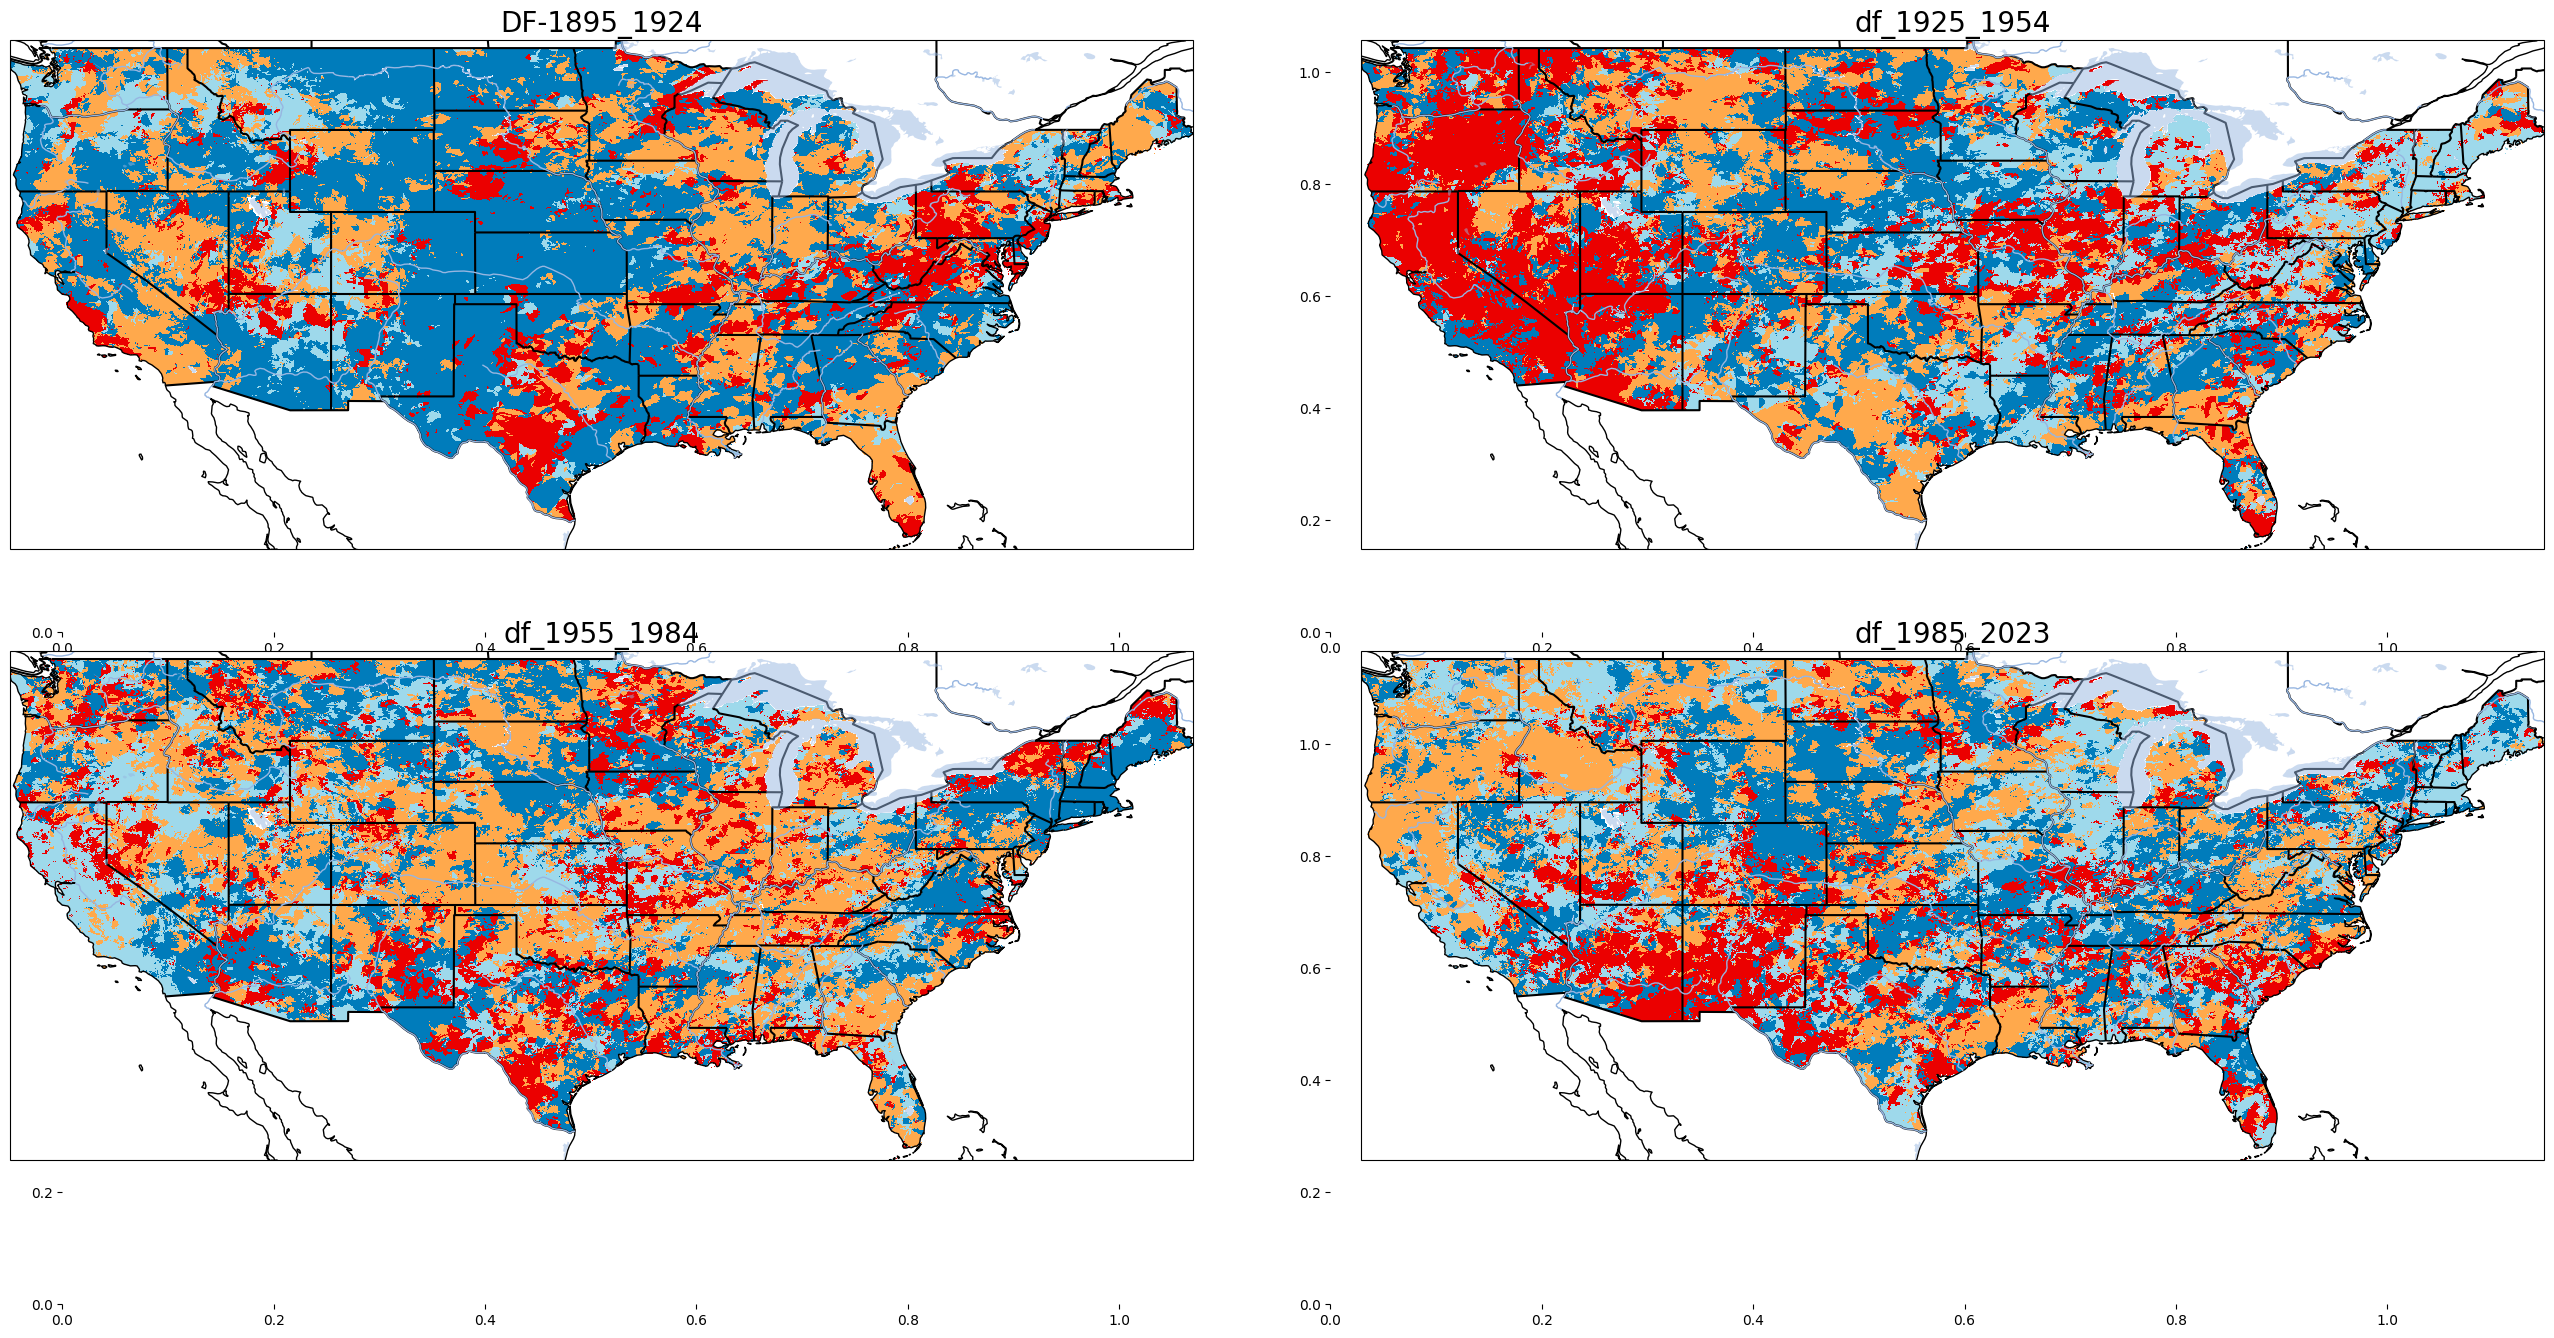

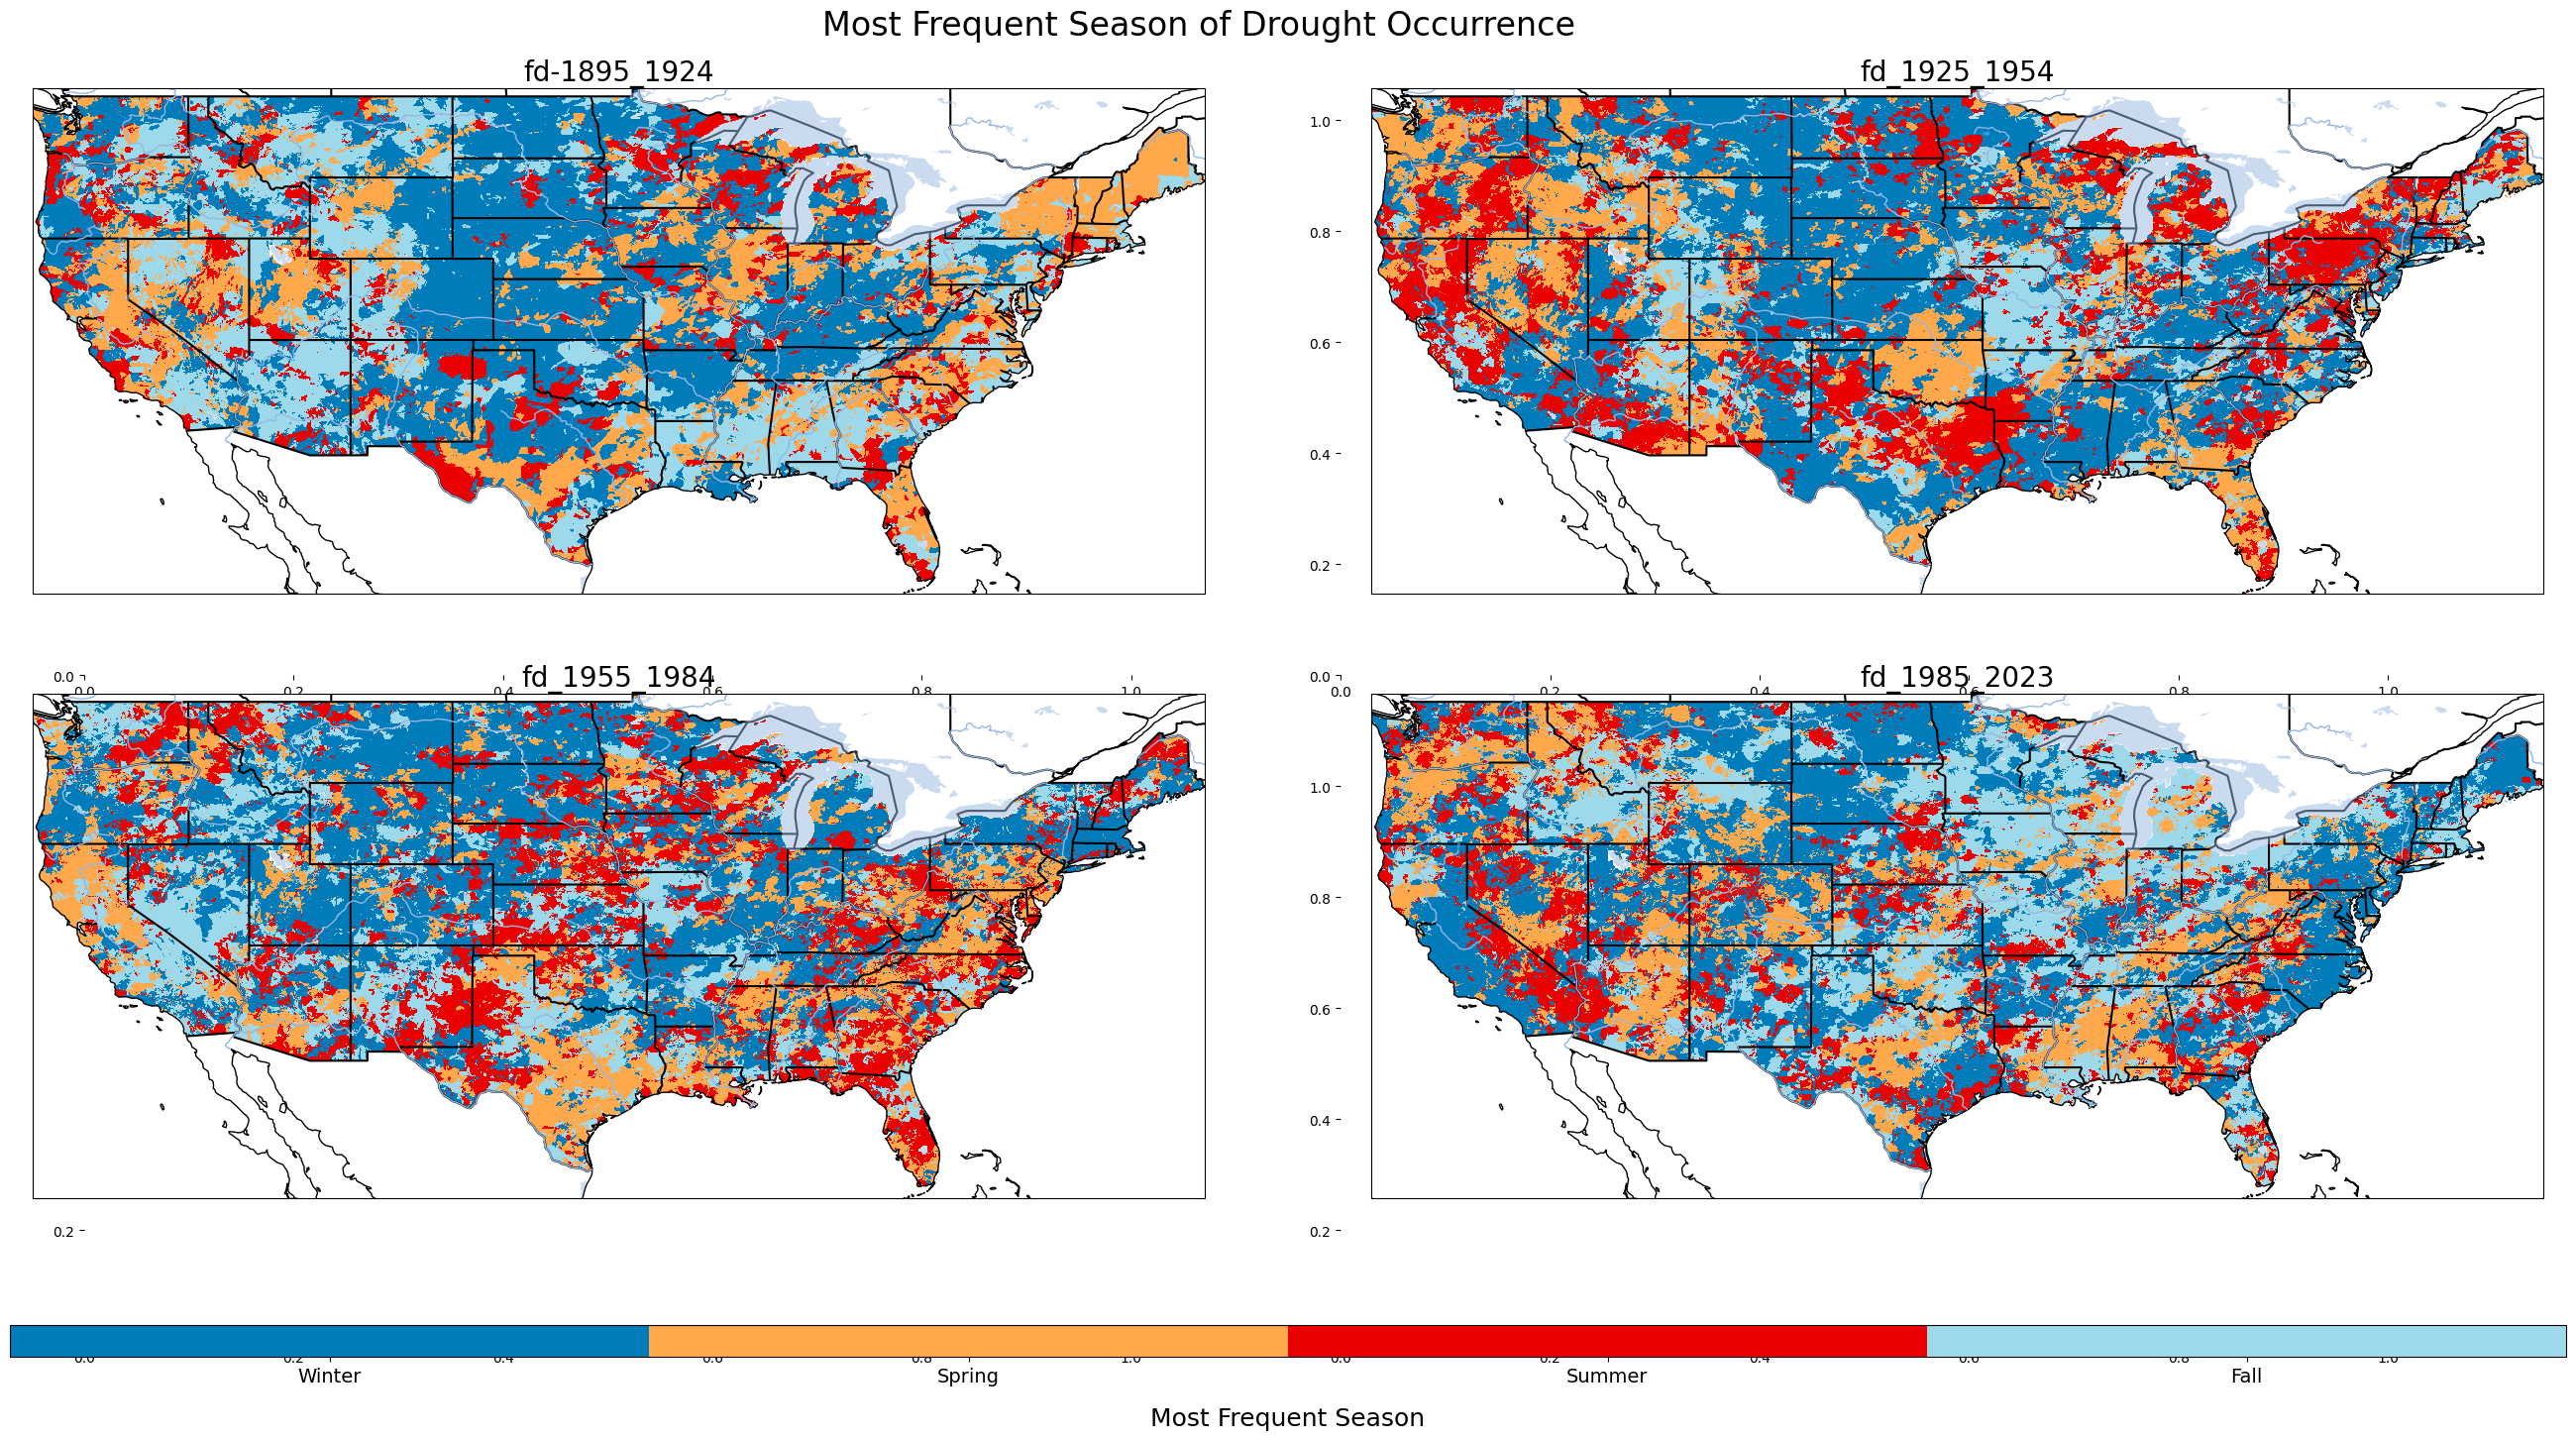

In [168]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import numpy as np

# plt.rcdefaults()
dataset = [[mfm_df_01, mfm_df_02, mfm_df_03, mfm_df_04],
          [mfm_fd_01, mfm_fd_02, mfm_fd_03, mfm_fd_04]]

year = [['DF-1895_1924', 'df_1925_1954', 'df_1955_1984', 'df_1985_2023'],
       ['fd-1895_1924', 'fd_1925_1954', 'fd_1955_1984', 'fd_1985_2023']]

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

plt.rc('axes.spines', **{'bottom':False, 'left':False, 'right':False, 'top':False})
# Define seasons
def month_to_season(month):
    if np.isnan(month):
        return np.nan
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

# Define colormap and norm for seasons
season_colors = ['#007cbb', '#FFA94C', '#eb0000', '#9ED9EB']  # Blue, Green, Orange, Brown
cmap = mcolors.ListedColormap(season_colors)
cmap.set_bad('white', 1.)
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5], ncolors=4)
ocean_color = np.float64([209,230,241])/255
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])


for k in range(2):
    fig, ax = plt.subplots(2, 2, figsize=(30, 16))
    gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
    gs.update(left=0.1, right=0.96, top=0.9, bottom=0.2, wspace=0.1, hspace=0.2)
    bottoms, tops, lefts, rights = gs.get_grid_positions(fig)

    for i in range(4):
        row, col = divmod(i, 2)
        ax_sub = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
    
        # Convert months to seasons
        seasonal_data = np.vectorize(month_to_season)(dataset[k][i]['dfaami'].values)
        
        c = ax_sub.pcolormesh(dataset[k][i]['lon'], dataset[k][i]['lat'], seasonal_data, 
                              transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

        ax_sub.add_feature(cfeature.COASTLINE)
        ax_sub.add_feature(cfeature.BORDERS, linewidth=1.5, linestyle='-')
        ax_sub.add_feature(states_provinces, linewidth=1.5, linestyle='-', edgecolor='k')
        ax_sub.add_feature(cfeature.LAND, edgecolor='black')
        ax_sub.add_feature(cfeature.OCEAN,color='#E9EBE6',zorder=0,edgecolor='k')
        ax_sub.add_feature(cfeature.LAKES, alpha=0.5)
        ax_sub.add_feature(cfeature.RIVERS)
        
#         ax_sub.set_aspect("auto")
        ax_sub.set_title('{}'.format(year[k][i]), size=20)

# Create a common colorbar
cax = fig.add_axes([lefts[0], 0.1, rights[1]-lefts[0], 0.02])
cbar = fig.colorbar(c, cax=cax, orientation="horizontal", extend="neither")
cbar.set_label('Most Frequent Season', size=18, labelpad=15)
cbar.ax.tick_params(labelsize=14)

# Adjust colorbar ticks to show season names
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['Winter', 'Spring', 'Summer', 'Fall'])

plt.suptitle('Most Frequent Season of Drought Occurrence', fontsize=24, y=0.95)


plt.show()

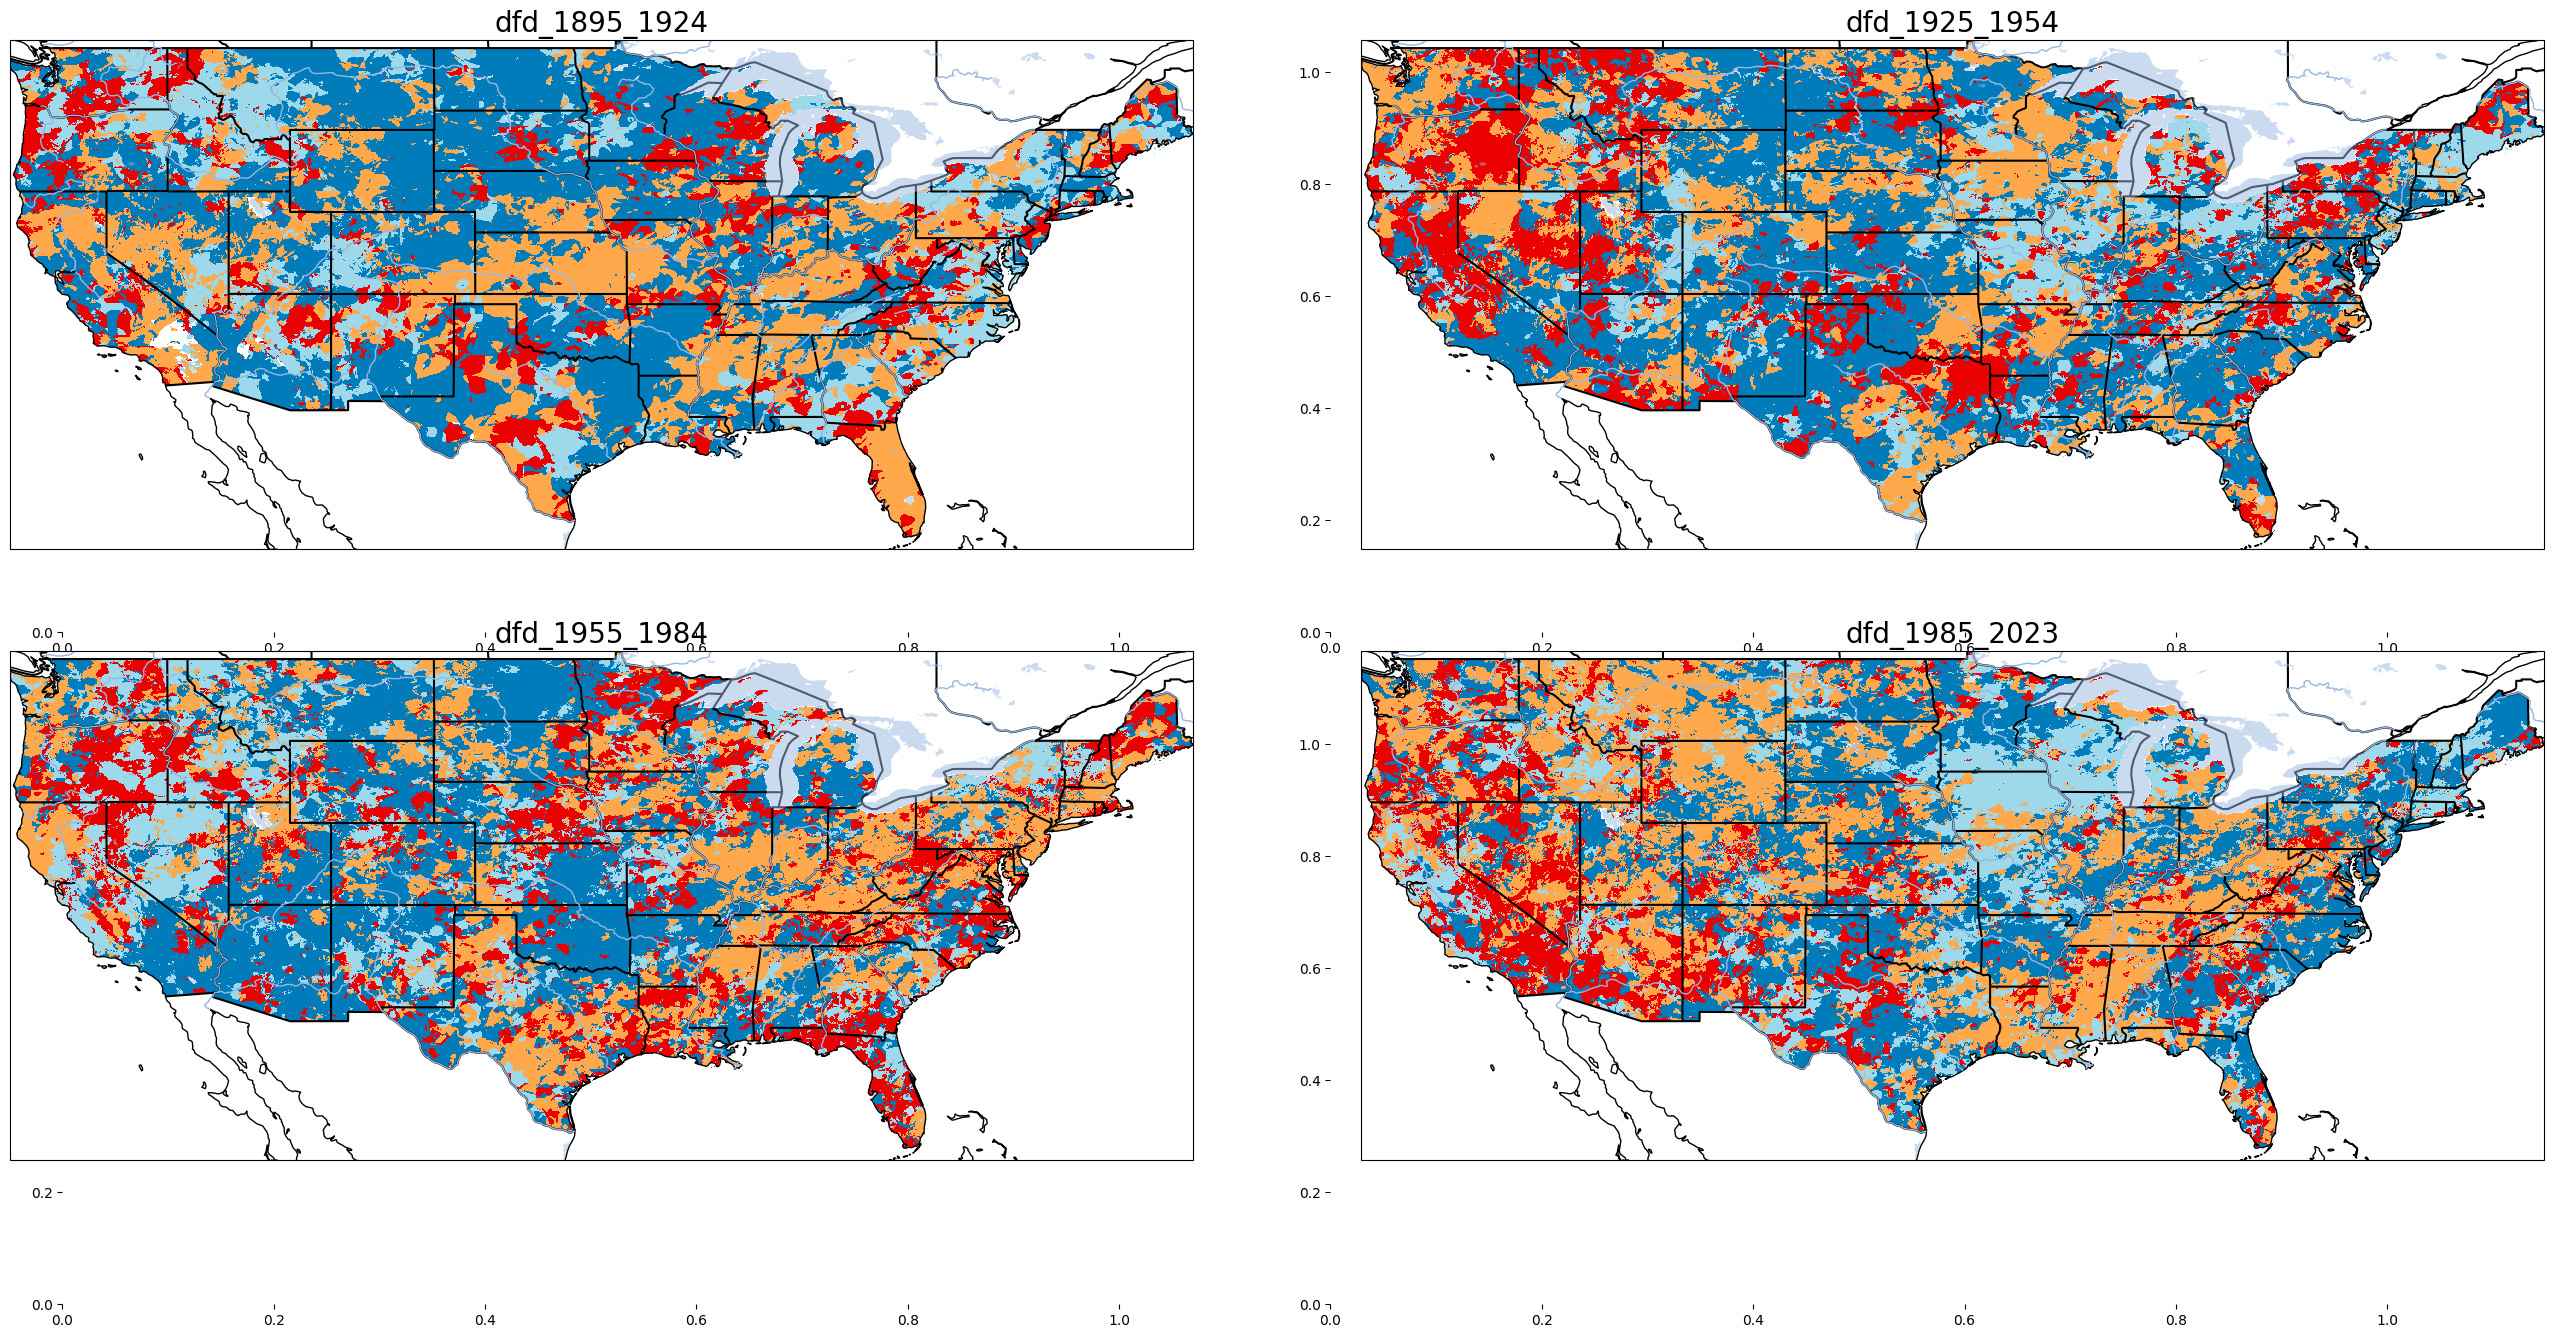

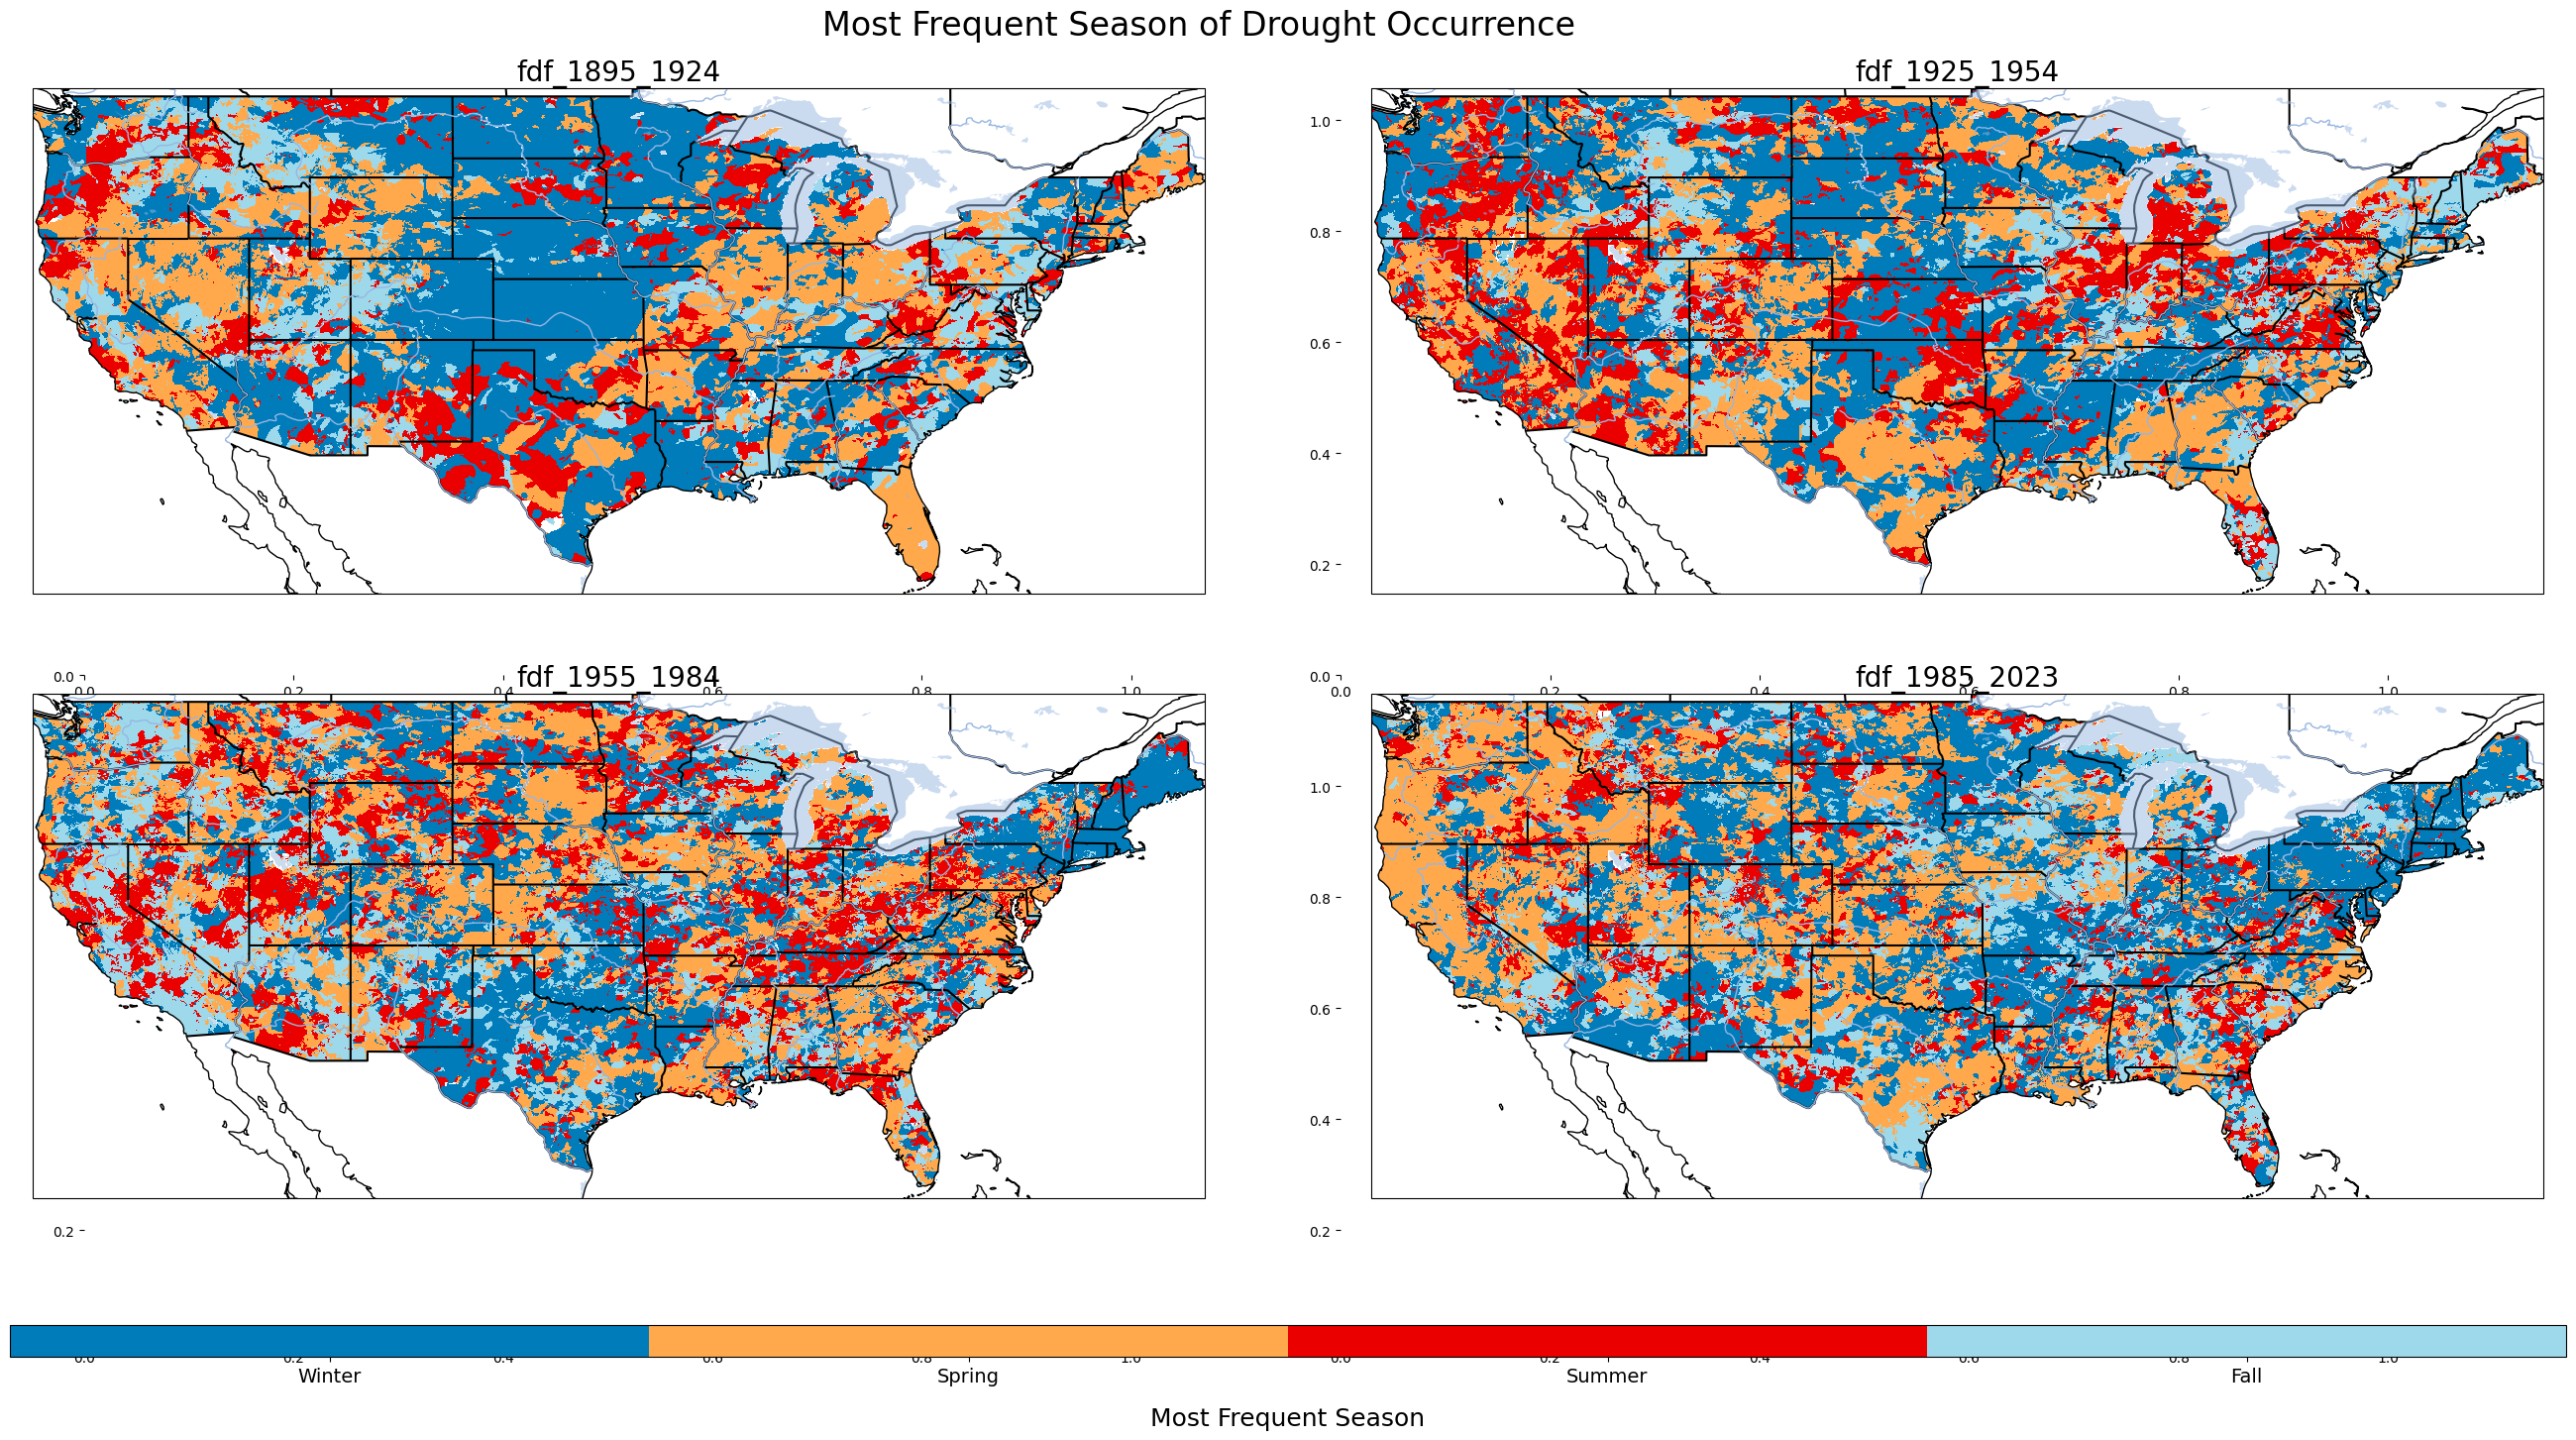

In [170]:
dataset = [[mfm_dfd_01, mfm_dfd_02, mfm_dfd_03, mfm_dfd_04],
          [mfm_fdf_01, mfm_fdf_02, mfm_fdf_03, mfm_fdf_04]]

year = [['dfd_1895_1924', 'dfd_1925_1954', 'dfd_1955_1984', 'dfd_1985_2023'],
       ['fdf_1895_1924', 'fdf_1925_1954', 'fdf_1955_1984', 'fdf_1985_2023']]
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

plt.rc('axes.spines', **{'bottom':False, 'left':False, 'right':False, 'top':False})
# Define seasons
def month_to_season(month):
    if np.isnan(month):
        return np.nan
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

# Define colormap and norm for seasons
season_colors = ['#007cbb', '#FFA94C', '#eb0000', '#9ED9EB']
cmap = mcolors.ListedColormap(season_colors)
cmap.set_bad('white', 1.)
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5], ncolors=4)
ocean_color = np.float64([209,230,241])/255
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])


for k in range(2):
    fig, ax = plt.subplots(2, 2, figsize=(30, 16))
    gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
    gs.update(left=0.1, right=0.96, top=0.9, bottom=0.2, wspace=0.1, hspace=0.2)
    bottoms, tops, lefts, rights = gs.get_grid_positions(fig)

    for i in range(4):
        row, col = divmod(i, 2)
        ax_sub = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
    
        # Convert months to seasons
        seasonal_data = np.vectorize(month_to_season)(dataset[k][i]['mi'].values)
        
        c = ax_sub.pcolormesh(dataset[k][i]['lon'], dataset[k][i]['lat'], seasonal_data, 
                              transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

        ax_sub.add_feature(cfeature.COASTLINE)
        ax_sub.add_feature(cfeature.BORDERS, linewidth=1.5, linestyle='-')
        ax_sub.add_feature(states_provinces, linewidth=1.5, linestyle='-', edgecolor='k')
        ax_sub.add_feature(cfeature.LAND, edgecolor='black')
        ax_sub.add_feature(cfeature.OCEAN,color='#E9EBE6',zorder=0,edgecolor='k')
        ax_sub.add_feature(cfeature.LAKES, alpha=0.5)
        ax_sub.add_feature(cfeature.RIVERS)
        
#         ax_sub.set_aspect("auto")
        ax_sub.set_title('{}'.format(year[k][i]), size=20)

# Create a common colorbar
cax = fig.add_axes([lefts[0], 0.1, rights[1]-lefts[0], 0.02])
cbar = fig.colorbar(c, cax=cax, orientation="horizontal", extend="neither")
cbar.set_label('Most Frequent Season', size=18, labelpad=15)
cbar.ax.tick_params(labelsize=14)

# Adjust colorbar ticks to show season names
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['Winter', 'Spring', 'Summer', 'Fall'])

plt.suptitle('Most Frequent Season of Drought Occurrence', fontsize=24, y=0.95)


plt.show()

In [259]:
FreqCountDF.sel(year=slice('2000-01-01','2024-12-01'))

<xarray.Dataset> Size: 152MB
Dimensions:                        (lat: 596, lon: 1385, year: 23)
Coordinates:
  * lat                            (lat) float32 2kB 24.56 24.6 ... 49.31 49.35
  * lon                            (lon) float32 6kB -124.7 -124.6 ... -67.02
  * year                           (year) int64 184B 2001 2002 ... 2022 2023
Data variables:
    __xarray_dataarray_variable__  (lat, lon, year) float64 152MB 0.0 ... 0.0

In [9]:
values = mk_DF.sel(lat=39.02, lon=-85.31, method='nearest').drop_encoding()
res = mk.original_test(values)
slope, intercept = res.slope, res.intercept
res

In [8]:
values = FreqCountDF.__xarray_dataarray_variable__.sel(lat=39.02, lon=-85.31, method='nearest').drop_encoding()
res = mk.original_test(values)
slope1, intercept1 = res.slope, res.intercept
res

Mann_Kendall_Test(trend='increasing', h=True, p=0.027054857640145702, z=2.2107254125197344, Tau=0.12124515503875968, s=1001.0, var_s=204611.66666666666, slope=0.0, intercept=1.0)

In [5]:
dfaami.dfaami.where(dfaami.dfaami>0.5).sel(lat=39.19, lon=-86.52, method='nearest')

<xarray.DataArray 'dfaami' (time: 1552)> Size: 12kB
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    lat      float32 4B 39.19
    lon      float32 4B -86.52
  * time     (time) datetime64[ns] 12kB 1895-01-01 1895-02-01 ... 2024-04-01

In [ ]:
from scipy import stats

ts1 = dfaami.dfaami.where(dfaami.dfaami>0.5).sel(lat=39.02, lon=-85.31, method='nearest')
ts2 = dfaami.dfaami.where(dfaami.dfaami<0.5).sel(lat=39.02, lon=-85.31, method='nearest')
ts3 = mi.mi.where(mi.mi>0.5).sel(lat=39.02, lon=-85.31, method='nearest')
ts4 = mi.mi.where(mi.mi<0.5).sel(lat=39.02, lon=-85.31, method='nearest')
time_series = [ts1, ts2, ts3, ts4]

count1 = FreqCountDF.__xarray_dataarray_variable__.sel(lat=39.02, lon=-85.31, method='nearest')
count2 = FreqCountFD.__xarray_dataarray_variable__.sel(lat=39.02, lon=-85.31, method='nearest')
count3 = FreqCountDFD.__xarray_dataarray_variable__.sel(lat=39.02, lon=-85.31, method='nearest')
count4 = FreqCountFDF.__xarray_dataarray_variable__.sel(lat=39.02, lon=-85.31, method='nearest')
count_series = [count1, count2, count3, count4]

trend1 = calculate_mk(FreqCountDF.__xarray_dataarray_variable__.sel(lat=39.02, lon=-85.31, method='nearest'))
trend2 = calculate_mk(FreqCountFD.__xarray_dataarray_variable__.sel(lat=39.02, lon=-85.31, method='nearest'))
trend_series = [trend1, trend2]

In [ ]:
calculate_mk(dfaami.dfaami.where(dfaami.dfaami>0.5).sel(lat=39.02, lon=-85.31, method='nearest'))

/N/u/alpande/Quartz/.local/lib/python3.10/site-packages/xarray/core/groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(
/N/u/alpande/Quartz/.local/lib/python3.10/site-packages/xarray/core/groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


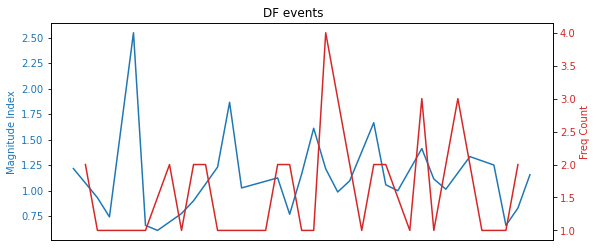

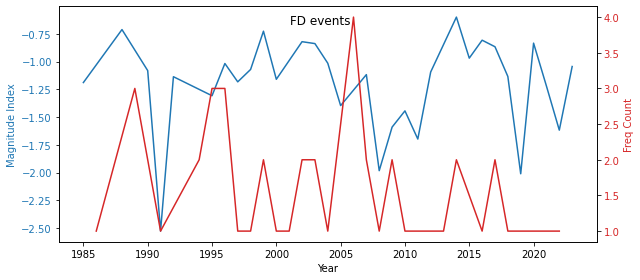

In [5]:
names = ['DF events', 'FD events', 'DFD events', 'FDF events']
for i in range(2):

    data = time_series[i].resample(time='1Y').mean(skipna=True).sel(time=slice('1985-01-01','2024-12-01'))
    years = np.arange(1985, 2024)
    mask = np.isfinite(data)


    data2 = count_series[i]
    data2 = data2.sel(year=slice('1985-01-01','2024-12-01'))
    mask2 = np.where(data2>0)

    fig, ax1 = plt.subplots(figsize=(9, 4), sharex=True)
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Magnitude Index', color=color)
    ax1.plot(years[mask], data[mask], color=color, label='Magnitude index')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx() 
    color = 'tab:red'
    ax2.set_ylabel('Freq Count', color=color) 
    ax2.plot(years[mask2], data2[mask2], color=color, label='Freq Count')
    ax2.tick_params(axis='y', labelcolor=color)
    
    if i != 1:
        ax1.get_xaxis().set_visible(False)
        ax2.get_xaxis().set_visible(False)
    fig.text(0.5, 0.9, '{}'.format(names[i]), ha='center', fontsize = 12)
fig.tight_layout()
plt.show()

In [ ]:

# Assume you have the slopes and p_values arrays
slopes = [0.02, 0.03]  # Example slopes for the two plots
p_values = [0.05, 0.03]  # Example p-values for the two plots

names = ['DF events', 'FD events', 'DFD events', 'FDF events']
for i in range(1):

    data = time_series[i].resample(time='1Y').mean(skipna=True).sel(time=slice('1985-01-01','2024-12-01'))
    years = np.arange(1985, 2024)
    mask = np.isfinite(data)

    data2 = count_series[i]
    data2 = data2.sel(year=slice('1985-01-01','2024-12-01'))
    mask2 = np.where(data2 > 0)

    fig, ax1 = plt.subplots(figsize=(9, 4), sharex=True)
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Magnitude Index', color=color)
    ax1.plot(years[mask], data[mask], color=color, label='Magnitude index')
    ax1.tick_params(axis='y', labelcolor=color)

    # Add trend line for magnitude index
    if trend[i][3] is not None:
        trend_line = trend[i][3] * years + data.mean()
        ax1.plot(years, trend_line, color='blue', linestyle='dashed', label='Trend line')
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Freq Count', color=color)
    ax2.plot(years[mask2], data2[mask2], color=color, label='Freq Count')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Add trend line for frequency count
    if trend[i] is not None:
        trend_line2 = slopes[i] * years + data2.mean()
        ax2.plot(years, trend_line2, color='red', linestyle='dashed', label='Trend line')

    if i != 1:
        ax1.get_xaxis().set_visible(False)
        ax2.get_xaxis().set_visible(False)
    fig.text(0.5, 0.9, '{}'.format(names[i]), ha='center', fontsize=12)
fig.tight_layout()
plt.show()

In [11]:
inLat = mk_DF.sel(lat=slice('39', '41.44'), lon=slice(-87.35, -85))
latval = inLat.lat.values
lonval = inLat.lon.values
print(np.where(inLat.trend=='increasi'))

inLat.sel(lat=latval[0], lon=lonval[49])


(array([ 0,  0,  1,  4,  5,  5, 19, 19, 20, 52, 53, 54, 55, 55, 55, 56, 56]), array([48, 49, 50, 53, 54, 55, 13, 14, 17, 22, 23,  6,  3,  4,  6,  6,  7]))


<xarray.Dataset> Size: 57B
Dimensions:  ()
Coordinates:
    lat      float32 4B 39.02
    lon      float32 4B -85.27
Data variables:
    trend    <U8 32B 'increasi'
    h        bool 1B True
    p        float64 8B 0.01621
    slope    float64 8B 0.0

In [20]:
dfaami_df = dfaami.where(dfaami.dfaami>0.5, np.nan)

In [2]:
def calculate_mk(values):
    if (np.isnan(values).all()):
        return 'no trend', 0, 1.0, 0
    val = mk.original_test(values)
    return val.trend, val.h, val.p, val.slope

In [22]:
start = datetime.now()

result = xr.apply_ufunc(
    calculate_mk, 
    dfaami_df.dfaami,
    input_core_dims=[['time']], 
    output_core_dims=[[], [], [], []],
    dask='parallelized',  
    vectorize=True,
)

print(datetime.now() - start)


3:41:39.282972


In [31]:
data_vars = {
    'trend': result[0],
    'h': result[1],
    'p': result[2],
    'slope': result[3]
}
merged_dataset = xr.Dataset(data_vars)

merged_dataset.to_netcdf('./data/mk/mk_DF_mag.nc')

In [2]:
magDF = xr.open_dataset('./data/mk/mk_DF_mag.nc')

NameError: name 'xr' is not defined

In [3]:
magDF.drop_encoding()

NameError: name 'magDF' is not defined

In [21]:
(FreqCountFD['__xarray_dataarray_variable__'] - FreqCountDF['__xarray_dataarray_variable__']).sum()

<xarray.DataArray '__xarray_dataarray_variable__' ()> Size: 8B
array(-746539.)

In [13]:
total_frequency = FreqCountFD['__xarray_dataarray_variable__'].sum(dim='year', skipna=True)

num_years = len(FreqCountDF['year'])
mean_annual_frequency = total_frequency / num_years

print("Mean Annual Frequency:")
print(mean_annual_frequency)


mean_annual_frequency.to_netcdf('./data/sample01.nc')
mAFFD = xr.open_dataset('./data/sample01.nc')
val = mAFFD.rename({'__xarray_dataarray_variable__':'count'})
val.to_netcdf('./data/Event Data/meanAnnualFreq/mAFFD.nc')

Mean Annual Frequency:
<xarray.DataArray '__xarray_dataarray_variable__' (lat: 596, lon: 1385)> Size: 7MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 2kB 24.56 24.6 24.65 24.69 ... 49.27 49.31 49.35
  * lon      (lon) float32 6kB -124.7 -124.6 -124.6 ... -67.1 -67.06 -67.02
